In [1]:
#Importing Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import category_encoders as ce
from sklearn.preprocessing import OneHotEncoder
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score
from sklearn.metrics import cohen_kappa_score
from sklearn.model_selection import train_test_split
from xgboost import XGBClassifier

In [2]:
#Loading the dataset
df = pd.read_excel (r'/home/rudy/Downloads/churn(1).xlsx')
print (df)


        id State  Account_Length  Area_Code     Phone Intl_Plan VMail_Plan  \
0        1    KS             128        415  382-4657        no        yes   
1        2    OH             107        415  371-7191        no        yes   
2        3    NJ             137        415  358-1921        no         no   
3        4    OH              84        408  375-9999       yes         no   
4        5    OK              75        415  330-6626       yes         no   
...    ...   ...             ...        ...       ...       ...        ...   
3318  3319    AZ             192        415  414-4276        no        yes   
3319  3320    WV              68        415  370-3271        no         no   
3320  3321    RI              28        510  328-8230        no         no   
3321  3322    CT             184        510  364-6381       yes         no   
3322  3323    TN              74        415  400-4344        no        yes   

      Vmail_Message  Day_Mins  Day_Calls  ...  Eve_Calls  Eve_C

In [3]:
train, test = train_test_split(df, test_size=0.2)

In [4]:
print(train)

        id State  Account_Length  Area_Code     Phone Intl_Plan VMail_Plan  \
2023  2024    NJ             162        408  367-8692        no         no   
2353  2354    VT             116        415  408-4911        no         no   
3064  3065    WV             113        510  386-6408        no         no   
1919  1920    WY              70        415  365-6205        no         no   
2876  2877    PA              85        408  405-9573        no         no   
...    ...   ...             ...        ...       ...       ...        ...   
1471  1472    OH              75        415  340-9803        no         no   
774    775    OR              80        415  391-8087        no         no   
2305  2306    MT              42        415  378-7872        no         no   
1578  1579    HI             106        415  352-8508        no         no   
2564  2565    OR              97        415  417-2774        no         no   

      Vmail_Message  Day_Mins  Day_Calls  ...  Eve_Calls  Eve_C

In [5]:
print(test)

        id State  Account_Length  Area_Code     Phone Intl_Plan VMail_Plan  \
1250  1251    NV              81        415  395-5783        no         no   
461    462    RI             115        408  360-3525        no         no   
414    415    OR              76        415  410-9477        no         no   
63      64    SD             149        408  332-8160        no        yes   
2018  2019    SD              93        510  408-4836        no         no   
...    ...   ...             ...        ...       ...       ...        ...   
2068  2069    AZ             100        415  390-1552        no         no   
1018  1019    WY              76        415  408-6326        no         no   
2115  2116    RI             127        415  400-1280        no        yes   
310    311    MN              62        415  366-7912        no         no   
1656  1657    VA             136        408  411-5078        no         no   

      Vmail_Message  Day_Mins  Day_Calls  ...  Eve_Calls  Eve_C

In [6]:
#displaying column names
lst = df.columns.tolist()
for i in range(len(lst)):
    print(i+1,'\t',lst[i])


1 	 id
2 	 State
3 	 Account_Length
4 	 Area_Code
5 	 Phone
6 	 Intl_Plan
7 	 VMail_Plan
8 	 Vmail_Message
9 	 Day_Mins
10 	 Day_Calls
11 	 Day_Charge
12 	 Eve_Mins
13 	 Eve_Calls
14 	 Eve_Charge
15 	 Night_Mins
16 	 Night_Calls
17 	 Night_Charge
18 	 Intl_Mins
19 	 Intl_Calls
20 	 Intl_Charge
21 	 CustServ_Calls
22 	 Churn


In [7]:
#Exploring the dataset

In [8]:
# Display the head of the data
train.head()

,id,State,Account_Length,Area_Code,Phone,Intl_Plan,VMail_Plan,Vmail_Message,Day_Mins,Day_Calls,...,Eve_Calls,Eve_Charge,Night_Mins,Night_Calls,Night_Charge,Intl_Mins,Intl_Calls,Intl_Charge,CustServ_Calls,Churn
2023,2024,NJ,162,408,367-8692,no,no,0,217.6,87,...,71,23.72,250.7,65,11.28,10.4,4,2.81,2,True.
2353,2354,VT,116,415,408-4911,no,no,0,129.4,84,...,89,13.37,215.5,77,9.70,13.3,3,3.59,0,False.
3064,3065,WV,113,510,386-6408,no,no,0,72.5,88,...,112,17.34,117.9,118,5.31,6.6,3,1.78,1,False.
1919,1920,WY,70,415,365-6205,no,no,0,175.4,130,...,130,13.56,260.6,96,11.73,11.6,4,3.13,0,False.
2876,2877,PA,85,408,405-9573,no,no,0,144.4,88,...,105,22.49,185.4,94,8.34,9.9,3,2.67,1,False.


In [9]:
# Checking the missing values 
train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2658 entries, 2023 to 2564
Data columns (total 22 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   id              2658 non-null   int64  
 1   State           2658 non-null   object 
 2   Account_Length  2658 non-null   int64  
 3   Area_Code       2658 non-null   int64  
 4   Phone           2658 non-null   object 
 5   Intl_Plan       2658 non-null   object 
 6   VMail_Plan      2658 non-null   object 
 7   Vmail_Message   2658 non-null   int64  
 8   Day_Mins        2658 non-null   float64
 9   Day_Calls       2658 non-null   int64  
 10  Day_Charge      2658 non-null   float64
 11  Eve_Mins        2658 non-null   float64
 12  Eve_Calls       2658 non-null   int64  
 13  Eve_Charge      2658 non-null   float64
 14  Night_Mins      2658 non-null   float64
 15  Night_Calls     2658 non-null   int64  
 16  Night_Charge    2658 non-null   float64
 17  Intl_Mins       2658 non-null 

In [10]:
# describe the five points of statistics of numericals data
train.describe()

,id,Account_Length,Area_Code,Vmail_Message,Day_Mins,Day_Calls,Day_Charge,Eve_Mins,Eve_Calls,Eve_Charge,Night_Mins,Night_Calls,Night_Charge,Intl_Mins,Intl_Calls,Intl_Charge,CustServ_Calls
count,2658.000000,2658.000000,2658.000000,2658.000000,2658.000000,2658.000000,2658.000000,2658.000000,2658.000000,2658.000000,2658.000000,2658.000000,2658.000000,2658.000000,2658.000000,2658.000000,2658.000000
mean,1664.037998,101.415350,437.196388,8.344244,180.112491,100.586531,30.619707,201.007637,100.136569,17.085877,200.431565,99.676448,9.019507,10.250978,4.469150,2.768277,1.575997
std,962.543059,40.164497,42.326408,13.813561,54.461951,20.063717,9.258446,50.603986,20.062486,4.301298,50.799180,19.388291,2.286025,2.819537,2.454246,0.761221,1.325632
min,1.000000,1.000000,408.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,23.200000,33.000000,1.040000,0.000000,0.000000,0.000000,0.000000
25%,842.750000,74.000000,415.000000,0.000000,143.925000,88.000000,24.465000,165.800000,87.000000,14.090000,166.225000,86.000000,7.480000,8.500000,3.000000,2.300000,1.000000
50%,1669.500000,101.000000,415.000000,0.000000,180.500000,101.000000,30.690000,200.800000,100.000000,17.070000,200.700000,100.000000,9.030000,10.400000,4.000000,2.810000,1.000000
75%,2498.750000,128.000000,510.000000,21.000000,216.200000,114.000000,36.750000,235.475000,114.000000,20.017500,234.900000,113.000000,10.570000,12.100000,6.000000,3.270000,2.000000
max,3323.000000,243.000000,510.000000,51.000000,350.800000,165.000000,59.640000,363.700000,170.000000,30.910000,381.900000,175.000000,17.190000,18.900000,20.000000,5.100000,9.000000


In [11]:
# Describe the string data
train.describe(include='O')

,State,Phone,Intl_Plan,VMail_Plan,Churn
count,2658,2658,2658,2658,2658
unique,51,2658,2,3,2
top,WV,367-8692,no,no,False.
freq,87,1,2405,1901,2277


In [12]:
#Univariate Analysis
#for categorical variables
def with_per(total, axis):
    for p in axis.patches:
        percentage = '{:.1f}%'.format(100 * p.get_height()/total)
        x = p.get_x() + p.get_width()
        y = p.get_height()
        ax.annotate(percentage, (x, y),ha='center')


In [13]:
# extract the categorical variables
lst1 = [ feature for feature in train.columns if train[feature].dtypes=='O']
for i in range(len(lst1)):
    print(i+1,'\t',lst[i])

1 	 id
2 	 State
3 	 Account_Length
4 	 Area_Code
5 	 Phone


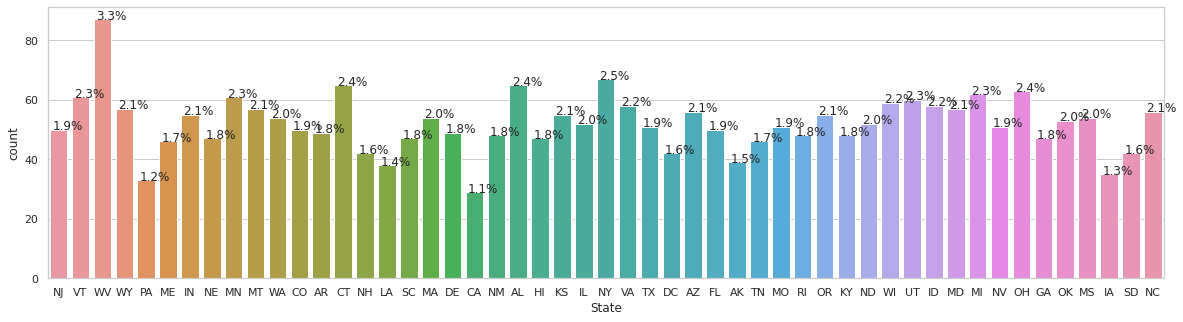

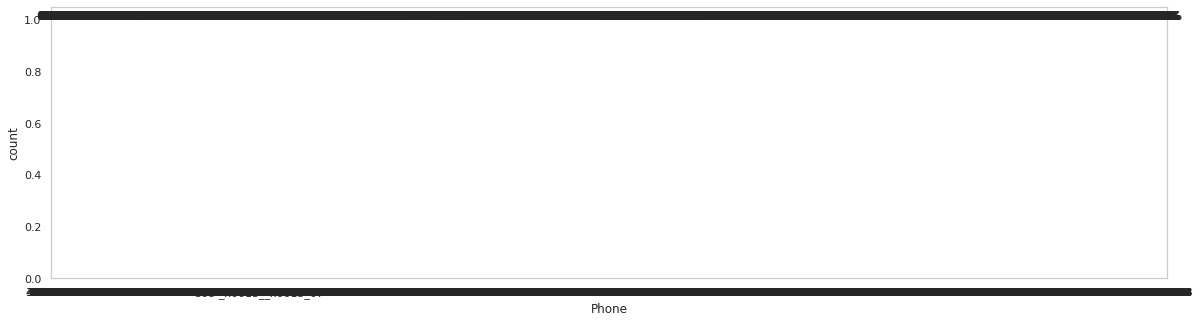

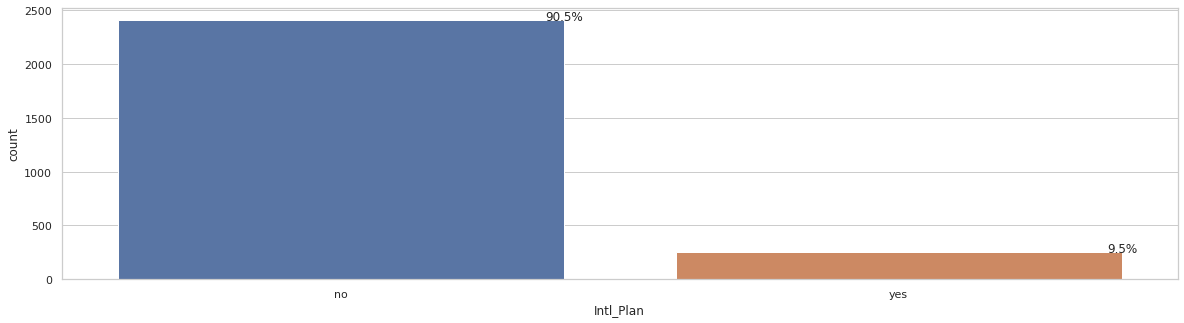

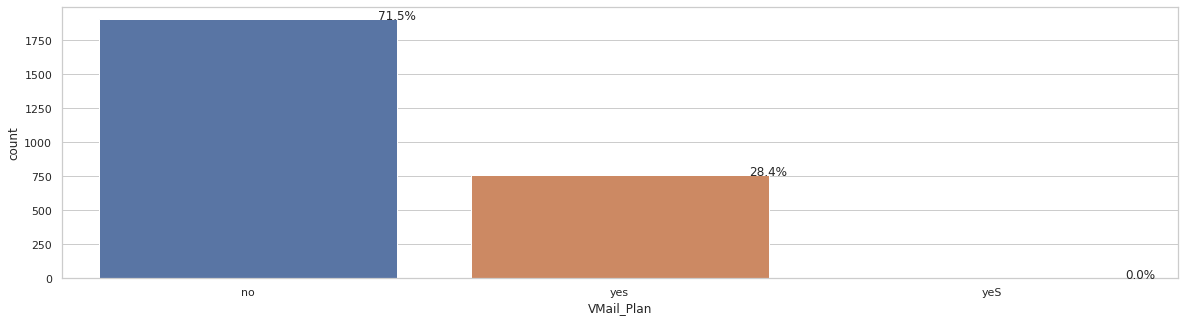

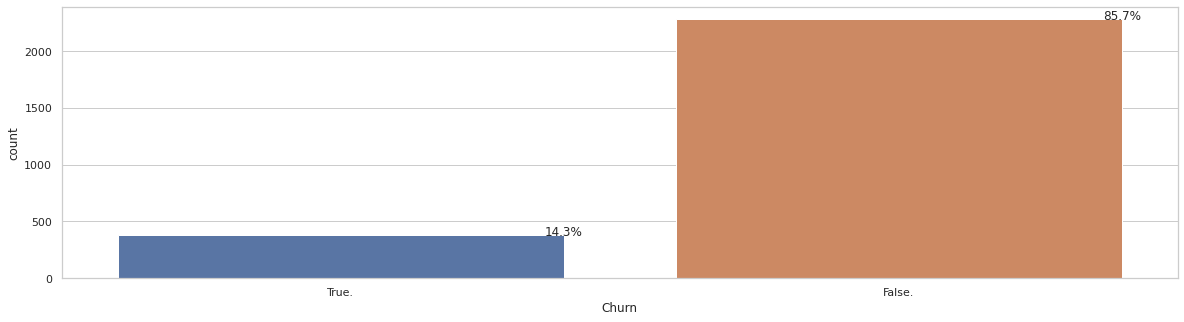

In [14]:
#display the all the categorical variable 
for feature in lst1:
    sns.set(style = 'whitegrid')
    plt.figure(figsize=(20,5))
    total = len(train)
    ax = sns.countplot(x = train[feature], data = train)
    #plt.title(feature)
    with_per(total, ax)
    plt.show()

In [15]:
#Extract the numerical features from the dataset
lst2 = [feature for feature in train.columns if train[feature].dtypes != 'O']
for i in range(len(lst2)):
    print(i+1,'\t',lst2[i])

1 	 id
2 	 Account_Length
3 	 Area_Code
4 	 Vmail_Message
5 	 Day_Mins
6 	 Day_Calls
7 	 Day_Charge
8 	 Eve_Mins
9 	 Eve_Calls
10 	 Eve_Charge
11 	 Night_Mins
12 	 Night_Calls
13 	 Night_Charge
14 	 Intl_Mins
15 	 Intl_Calls
16 	 Intl_Charge
17 	 CustServ_Calls


/home/rudy/.local/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


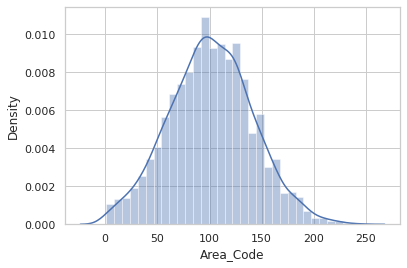

/home/rudy/.local/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


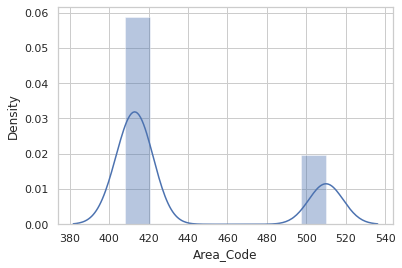

/home/rudy/.local/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


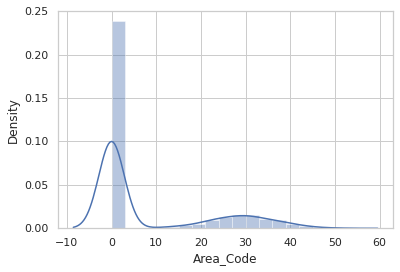

/home/rudy/.local/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


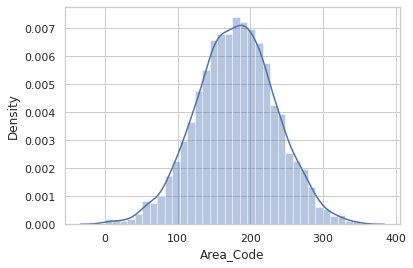

/home/rudy/.local/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


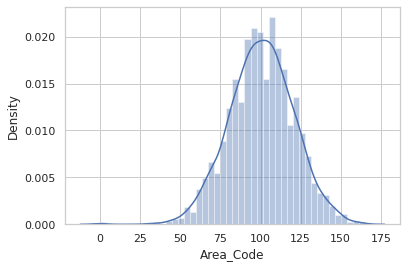

/home/rudy/.local/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


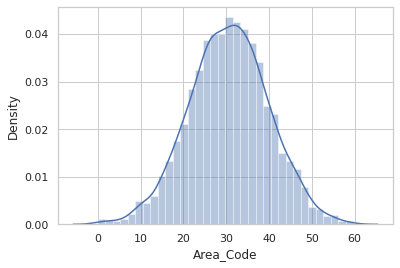

/home/rudy/.local/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


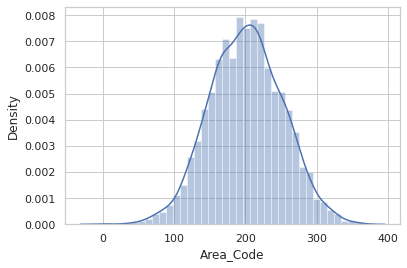

/home/rudy/.local/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


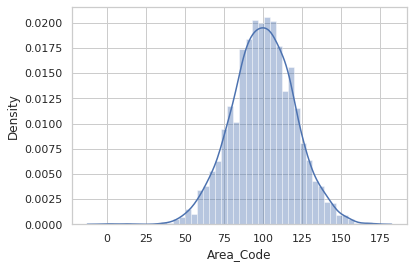

/home/rudy/.local/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


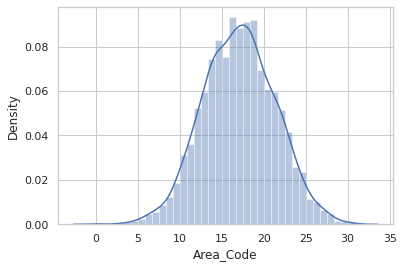

/home/rudy/.local/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


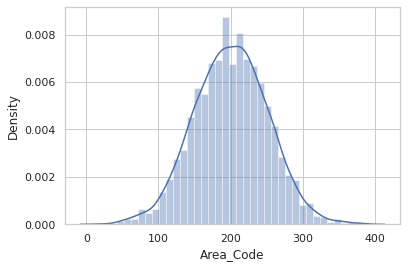

/home/rudy/.local/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


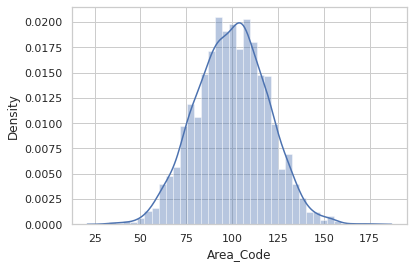

/home/rudy/.local/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


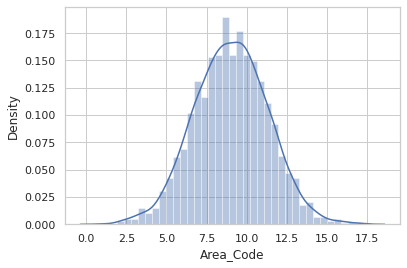

/home/rudy/.local/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


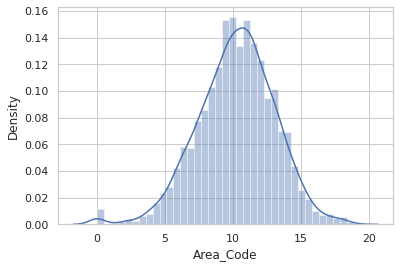

/home/rudy/.local/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


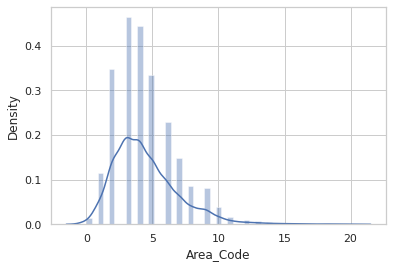

/home/rudy/.local/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


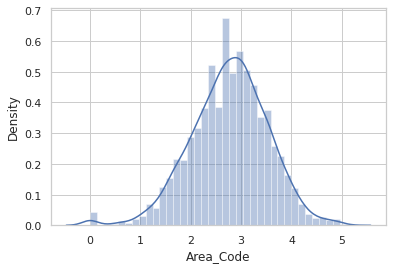

In [16]:
# Density plot of all the numerical features
for i in range(1,len(lst2)-1):
    sns.distplot(train[lst2[i]])
    plt.xlabel(lst2[2])
    plt.ylabel('Density')
    plt.show()

/home/rudy/.local/lib/python3.9/site-packages/seaborn/axisgrid.py:337: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)
/home/rudy/.local/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/home/rudy/.local/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


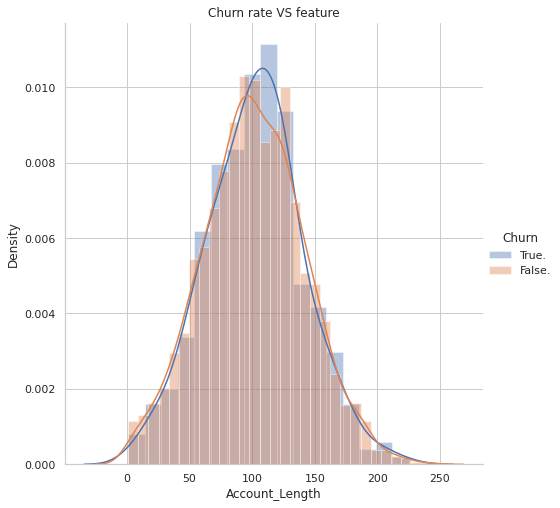

/home/rudy/.local/lib/python3.9/site-packages/seaborn/axisgrid.py:337: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)
/home/rudy/.local/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/home/rudy/.local/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


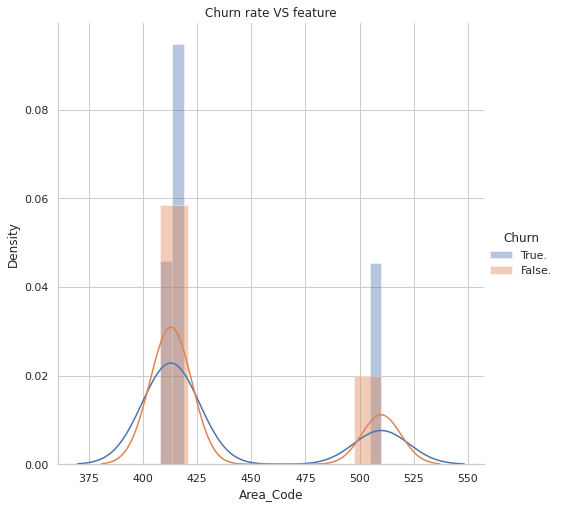

/home/rudy/.local/lib/python3.9/site-packages/seaborn/axisgrid.py:337: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)
/home/rudy/.local/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/home/rudy/.local/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


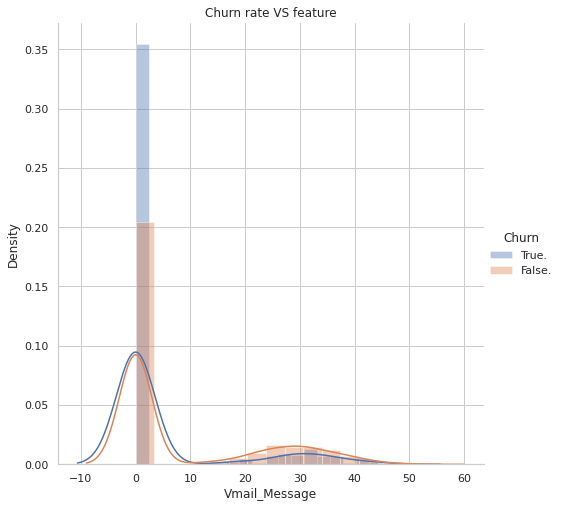

/home/rudy/.local/lib/python3.9/site-packages/seaborn/axisgrid.py:337: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)
/home/rudy/.local/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/home/rudy/.local/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


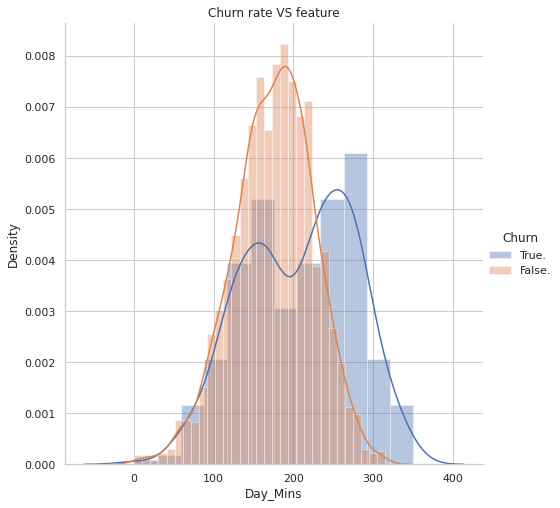

/home/rudy/.local/lib/python3.9/site-packages/seaborn/axisgrid.py:337: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)
/home/rudy/.local/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/home/rudy/.local/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


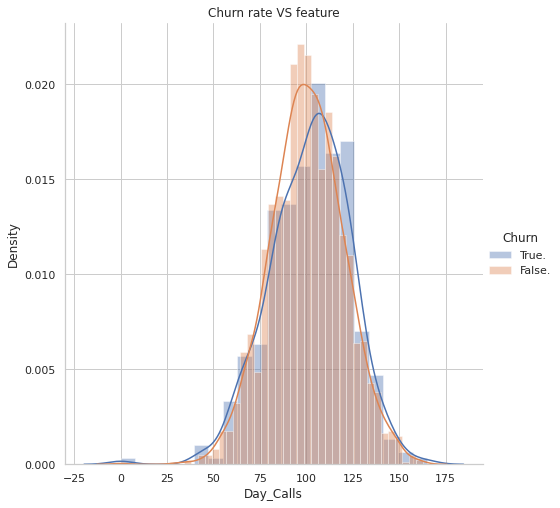

/home/rudy/.local/lib/python3.9/site-packages/seaborn/axisgrid.py:337: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)
/home/rudy/.local/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/home/rudy/.local/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


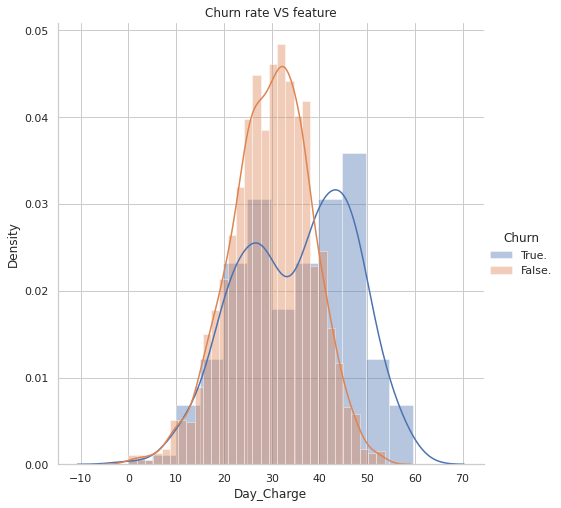

/home/rudy/.local/lib/python3.9/site-packages/seaborn/axisgrid.py:337: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)
/home/rudy/.local/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/home/rudy/.local/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


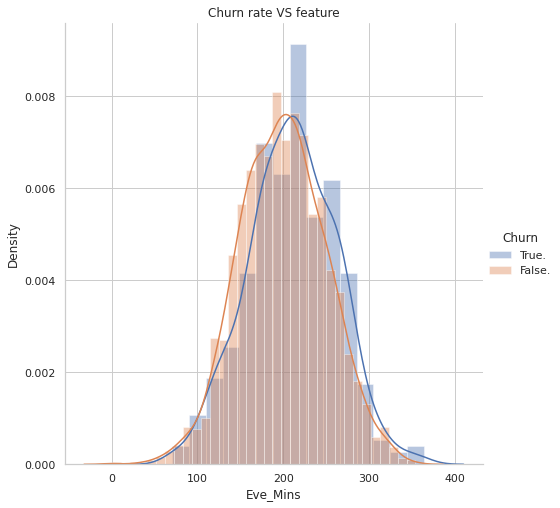

/home/rudy/.local/lib/python3.9/site-packages/seaborn/axisgrid.py:337: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)
/home/rudy/.local/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/home/rudy/.local/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


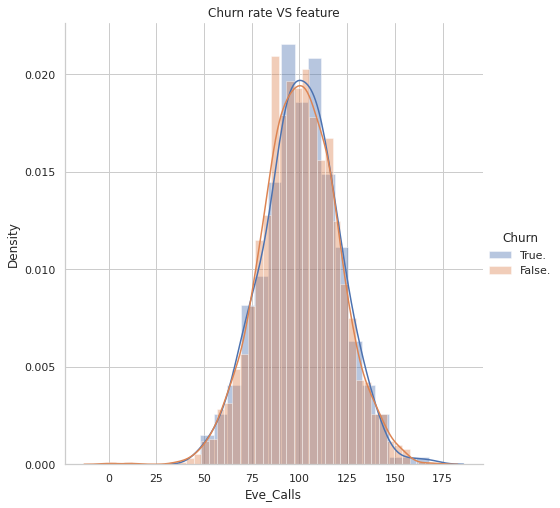

/home/rudy/.local/lib/python3.9/site-packages/seaborn/axisgrid.py:337: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)
/home/rudy/.local/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/home/rudy/.local/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


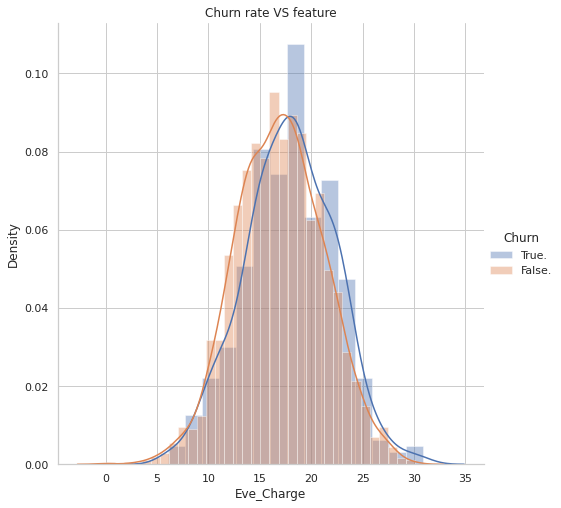

/home/rudy/.local/lib/python3.9/site-packages/seaborn/axisgrid.py:337: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)
/home/rudy/.local/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/home/rudy/.local/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


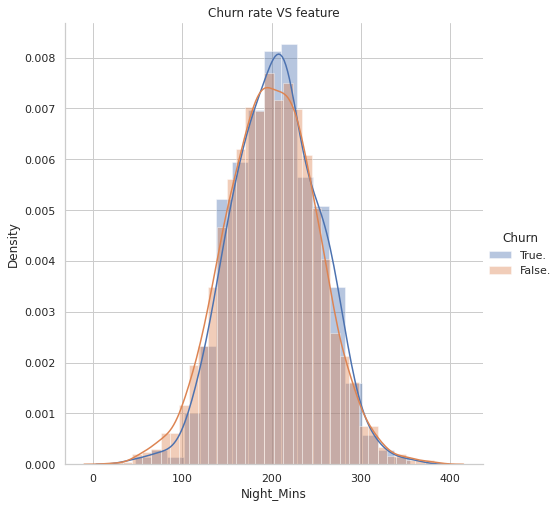

/home/rudy/.local/lib/python3.9/site-packages/seaborn/axisgrid.py:337: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)
/home/rudy/.local/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/home/rudy/.local/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


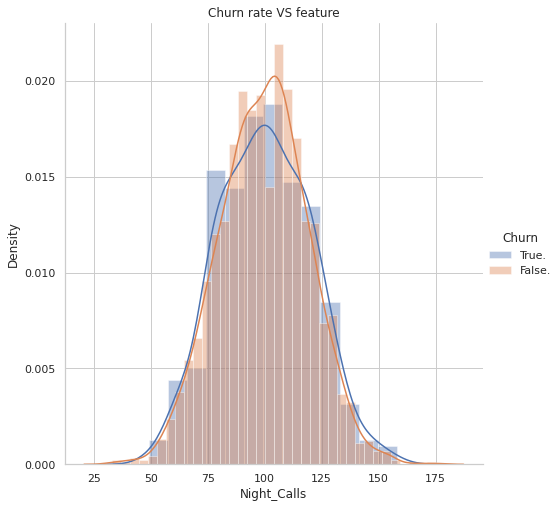

/home/rudy/.local/lib/python3.9/site-packages/seaborn/axisgrid.py:337: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)
/home/rudy/.local/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/home/rudy/.local/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


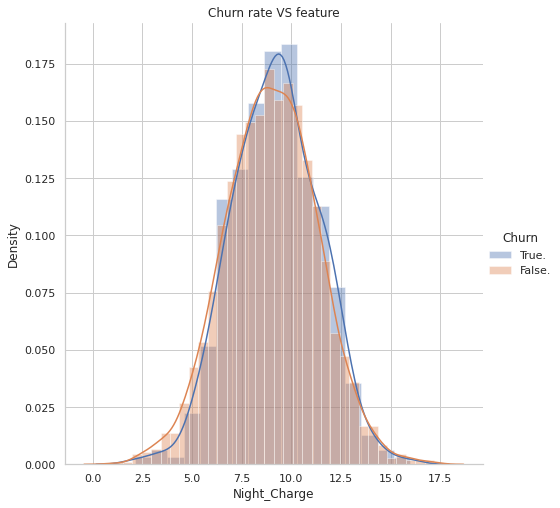

/home/rudy/.local/lib/python3.9/site-packages/seaborn/axisgrid.py:337: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)
/home/rudy/.local/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/home/rudy/.local/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


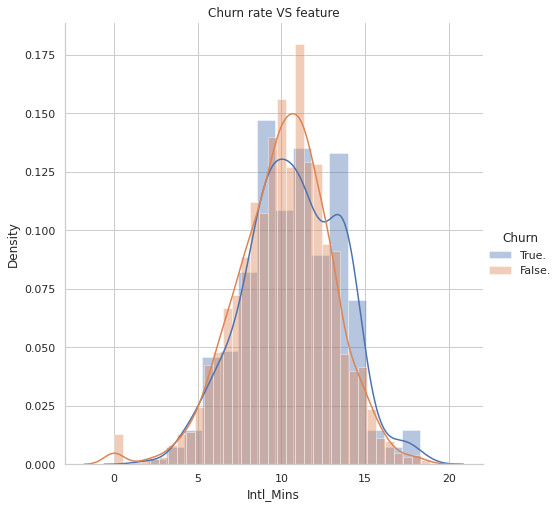

/home/rudy/.local/lib/python3.9/site-packages/seaborn/axisgrid.py:337: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)
/home/rudy/.local/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/home/rudy/.local/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


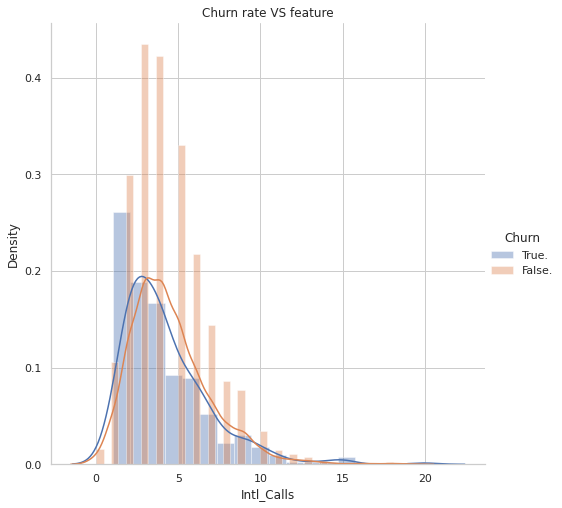

/home/rudy/.local/lib/python3.9/site-packages/seaborn/axisgrid.py:337: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)
/home/rudy/.local/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/home/rudy/.local/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


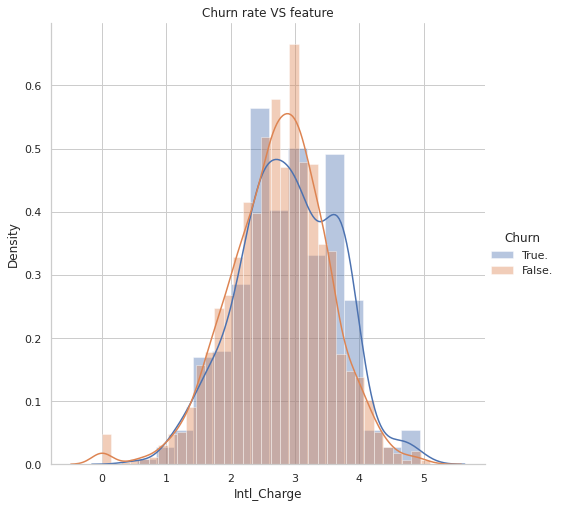

/home/rudy/.local/lib/python3.9/site-packages/seaborn/axisgrid.py:337: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)
/home/rudy/.local/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/home/rudy/.local/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


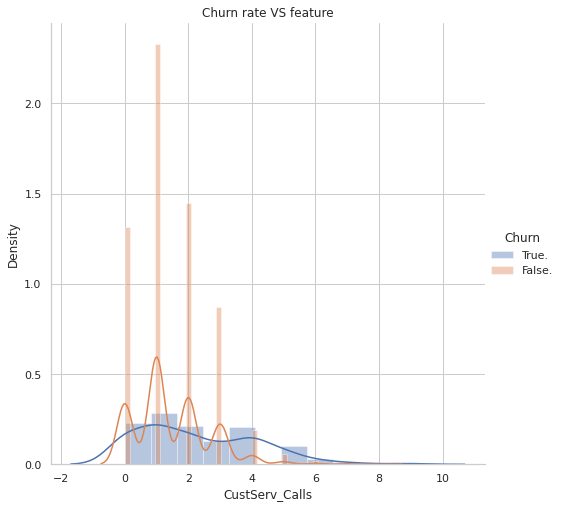

In [17]:
#bivariate analysis w.r.t churn rate
for i in range(1,len(lst2)):
    sns.FacetGrid(train, hue='Churn',size=7).map(sns.distplot, str(lst2[i])).add_legend()
    plt.title('Churn rate VS feature')
    plt.show()

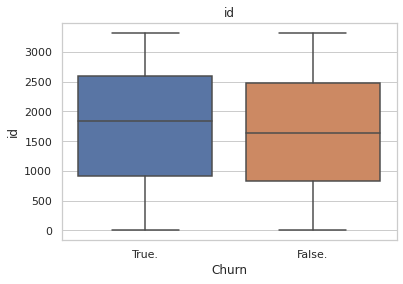

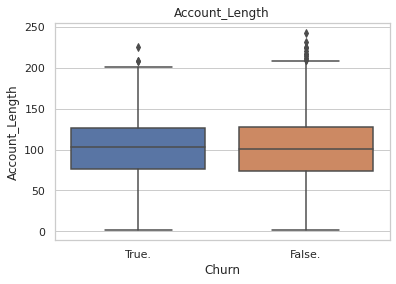

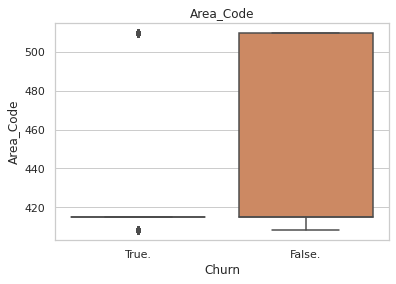

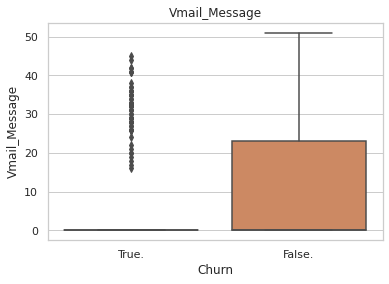

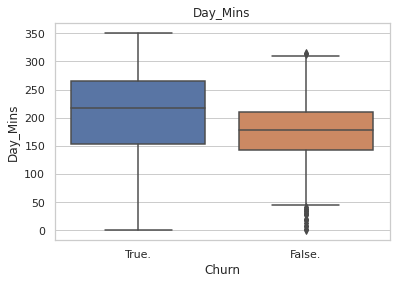

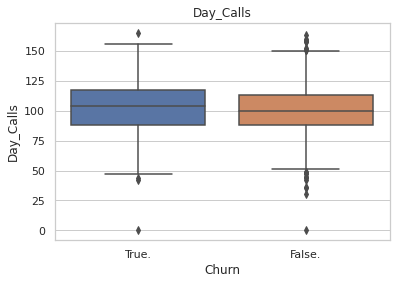

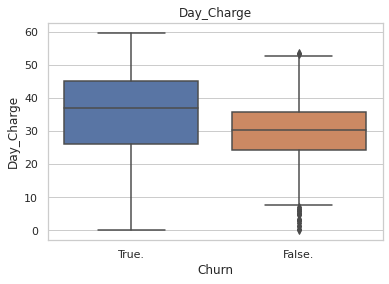

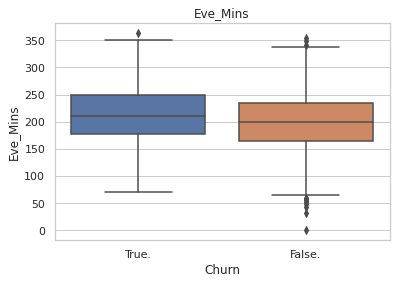

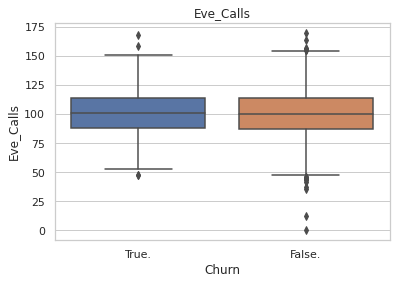

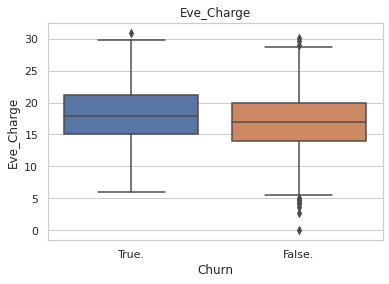

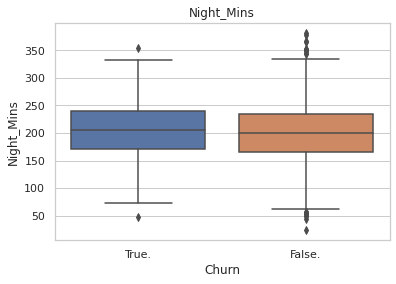

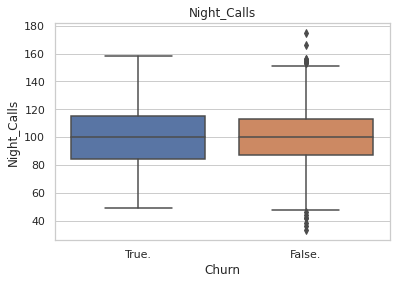

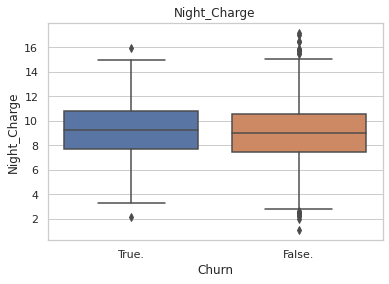

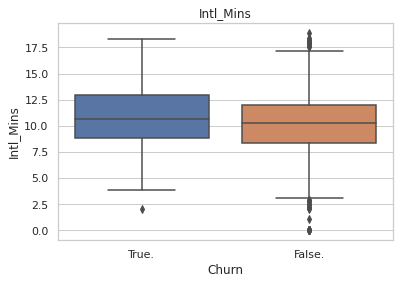

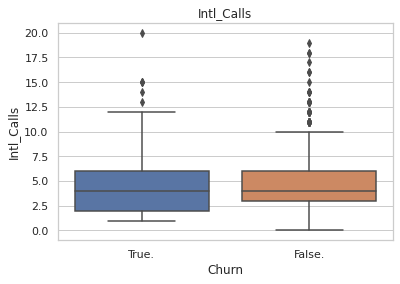

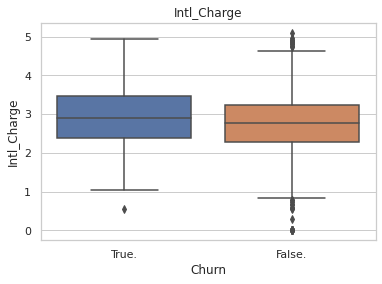

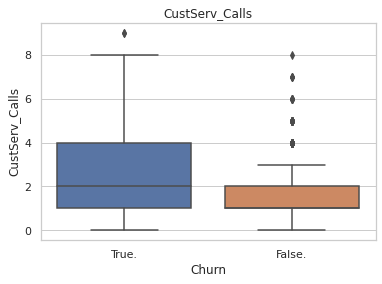

In [18]:
for feature in lst2:
    if feature != 'Churn':
        sns.boxplot(x ='Churn', y = feature, data = train)
        plt.title(feature)
        plt.show()

In [19]:
def ftb(df):
    for i in train.Churn:
        if i == 'False.':
            i = 0
        elif i == 'True.':
            i = 1
        else:
            i = 0

In [20]:
lst2.pop(-1)
for label in lst2:
    q1 = train[label].quantile(0.25)
    q3 = train[label].quantile(0.75)
    iqr = q3 - q1
    upper_bound = q3 + 1.5 * iqr
    lower_bound = q1 - 1.5 * iqr
    train[label] = train[label].mask(train[label]< lower_bound, train[label].median(),axis=0)
    train[label] = train[label].mask(train[label]> upper_bound, train[label].median(),axis=0)

   



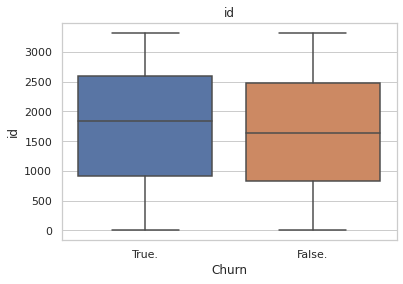

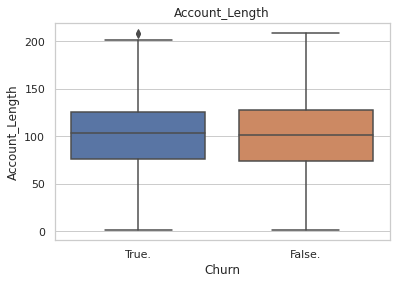

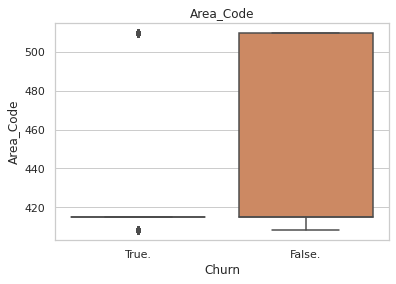

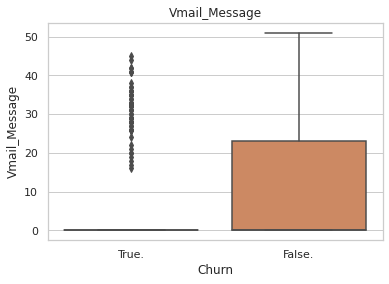

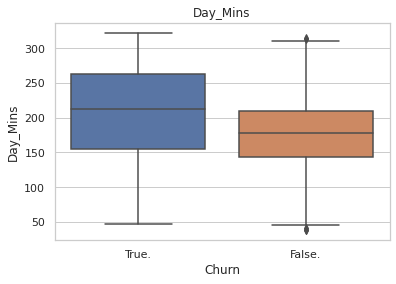

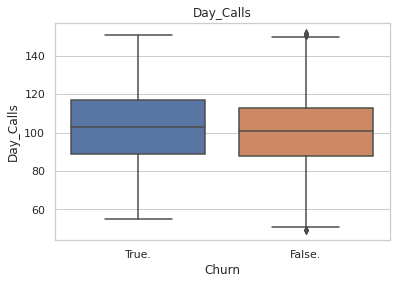

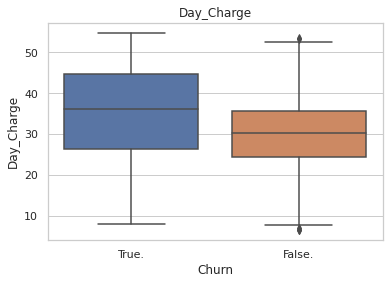

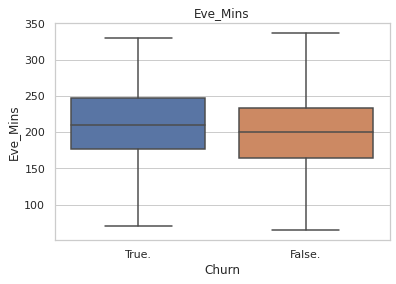

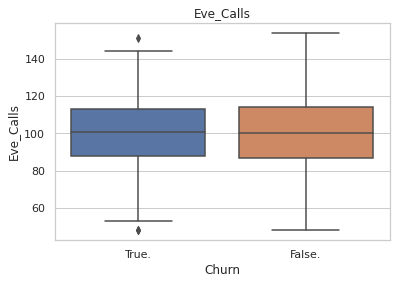

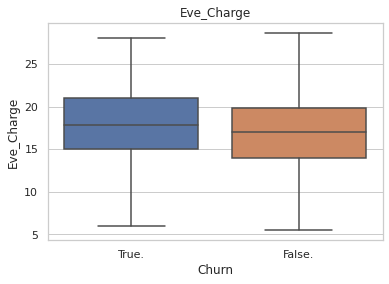

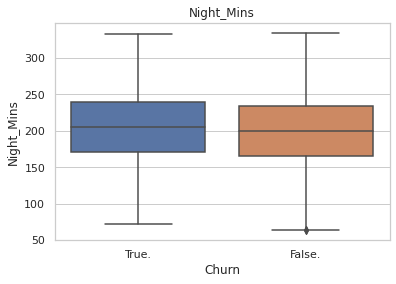

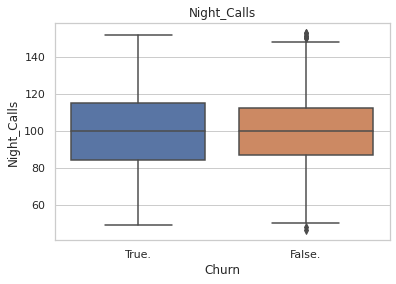

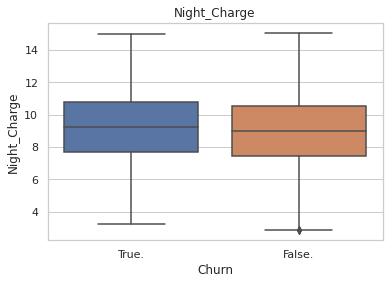

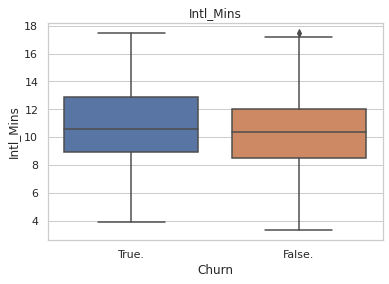

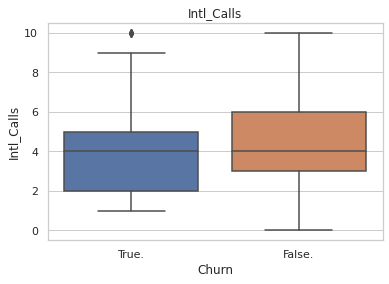

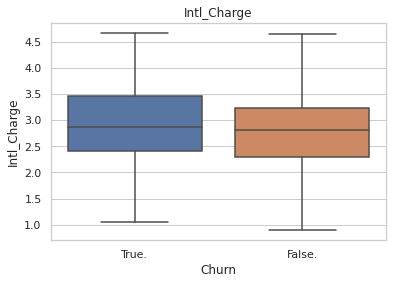

In [21]:
for feature in lst2:
    if feature != 'Churn':
        sns.boxplot(x ='Churn', y = feature, data = train)
        plt.title(feature)
        plt.show()


In [22]:
len(train.columns)

22

In [23]:
test.head()

,id,State,Account_Length,Area_Code,Phone,Intl_Plan,VMail_Plan,Vmail_Message,Day_Mins,Day_Calls,...,Eve_Calls,Eve_Charge,Night_Mins,Night_Calls,Night_Charge,Intl_Mins,Intl_Calls,Intl_Charge,CustServ_Calls,Churn
1250,1251,NV,81,415,395-5783,no,no,0,145.4,132,...,91,10.99,186.4,109,8.39,5.2,4,1.40,1,False.
461,462,RI,115,408,360-3525,no,no,0,147.9,109,...,117,19.41,299.7,90,13.49,9.6,9,2.59,3,False.
414,415,OR,76,415,410-9477,no,no,0,169.5,77,...,87,10.54,219.4,92,9.87,10.0,3,2.70,0,False.
63,64,SD,149,408,332-8160,no,yes,28,180.7,92,...,64,15.96,265.5,53,11.95,12.6,3,3.40,3,False.
2018,2019,SD,93,510,408-4836,no,no,0,328.1,106,...,89,12.89,303.5,114,13.66,8.7,3,2.35,1,True.


In [24]:
# replace no to 0 and yes to 1
train.Intl_Plan.replace(['no','yes'],[0,1],inplace = True)
train.VMail_Plan.replace(['no','yes'],[0,1],inplace=True)
train.Churn.replace(['False.','True.'],[0,1],inplace = True)
test.Intl_Plan.replace(['no','yes'],[0,1],inplace = True)
test.VMail_Plan.replace(['no','yes'],[0,1],inplace = True)
train.head()

,id,State,Account_Length,Area_Code,Phone,Intl_Plan,VMail_Plan,Vmail_Message,Day_Mins,Day_Calls,...,Eve_Calls,Eve_Charge,Night_Mins,Night_Calls,Night_Charge,Intl_Mins,Intl_Calls,Intl_Charge,CustServ_Calls,Churn
2023,2024,NJ,162.0,408,367-8692,0,0,0,217.6,87.0,...,71.0,23.72,250.7,65.0,11.28,10.4,4.0,2.81,2,1
2353,2354,VT,116.0,415,408-4911,0,0,0,129.4,84.0,...,89.0,13.37,215.5,77.0,9.70,13.3,3.0,3.59,0,0
3064,3065,WV,113.0,510,386-6408,0,0,0,72.5,88.0,...,112.0,17.34,117.9,118.0,5.31,6.6,3.0,1.78,1,0
1919,1920,WY,70.0,415,365-6205,0,0,0,175.4,130.0,...,130.0,13.56,260.6,96.0,11.73,11.6,4.0,3.13,0,0
2876,2877,PA,85.0,408,405-9573,0,0,0,144.4,88.0,...,105.0,22.49,185.4,94.0,8.34,9.9,3.0,2.67,1,0


In [25]:
# let us make an ANN with a Gaussian function to predict if the customer will churn or not
# we will take only numerical values 
# let us look at all numerical values which are stored in lst2
lst2.append('Churn') #for the output comparison
lst1.append('id') # we do not need it
lst2.pop(0)
for i in lst2:
    print(i)
# let us look at all categorical variables in our dataset stored in lst1
print('\n')
for i in lst1:
    print(i)

#let us drop all categorical values
train1 = train.drop(lst1,axis=1)

Account_Length
Area_Code
Vmail_Message
Day_Mins
Day_Calls
Day_Charge
Eve_Mins
Eve_Calls
Eve_Charge
Night_Mins
Night_Calls
Night_Charge
Intl_Mins
Intl_Calls
Intl_Charge
Churn


State
Phone
Intl_Plan
VMail_Plan
Churn
id


In [26]:
train1.drop(['Area_Code'],axis=1)

,Account_Length,Vmail_Message,Day_Mins,Day_Calls,Day_Charge,Eve_Mins,Eve_Calls,Eve_Charge,Night_Mins,Night_Calls,Night_Charge,Intl_Mins,Intl_Calls,Intl_Charge,CustServ_Calls
2023,162.0,0,217.6,87.0,36.99,279.0,71.0,23.72,250.7,65.0,11.28,10.4,4.0,2.81,2
2353,116.0,0,129.4,84.0,22.00,157.3,89.0,13.37,215.5,77.0,9.70,13.3,3.0,3.59,0
3064,113.0,0,72.5,88.0,12.33,204.0,112.0,17.34,117.9,118.0,5.31,6.6,3.0,1.78,1
1919,70.0,0,175.4,130.0,29.82,159.5,130.0,13.56,260.6,96.0,11.73,11.6,4.0,3.13,0
2876,85.0,0,144.4,88.0,24.55,264.6,105.0,22.49,185.4,94.0,8.34,9.9,3.0,2.67,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1471,75.0,0,150.6,99.0,25.60,301.5,83.0,25.63,158.7,104.0,7.14,8.1,5.0,2.19,0
774,80.0,0,161.1,99.0,27.39,198.8,81.0,16.90,228.4,116.0,10.28,10.6,4.0,2.86,1
2305,42.0,0,150.7,52.0,25.62,246.7,96.0,20.97,103.8,118.0,4.67,7.0,4.0,1.89,2
1578,106.0,0,147.9,97.0,25.14,209.3,99.0,17.79,162.1,80.0,7.29,8.8,5.0,2.38,2


In [27]:
train1['Churn'] = train.Churn

In [28]:
lista = [list(i) for i in zip(*train1.values)]

In [29]:
def std(lista):
    for i in range(len(lista)-1):
        l = 0
        for j in range(len(lista[0])):
            l = (lista[i][j]-max(lista[i]))/(max(lista[i])-min(lista[i]))
            lista[i][j] = l
    return lista

In [30]:
len(lista) # for how many weights

17

In [31]:
train1

,Account_Length,Area_Code,Vmail_Message,Day_Mins,Day_Calls,Day_Charge,Eve_Mins,Eve_Calls,Eve_Charge,Night_Mins,Night_Calls,Night_Charge,Intl_Mins,Intl_Calls,Intl_Charge,CustServ_Calls,Churn
2023,162.0,408,0,217.6,87.0,36.99,279.0,71.0,23.72,250.7,65.0,11.28,10.4,4.0,2.81,2,1
2353,116.0,415,0,129.4,84.0,22.00,157.3,89.0,13.37,215.5,77.0,9.70,13.3,3.0,3.59,0,0
3064,113.0,510,0,72.5,88.0,12.33,204.0,112.0,17.34,117.9,118.0,5.31,6.6,3.0,1.78,1,0
1919,70.0,415,0,175.4,130.0,29.82,159.5,130.0,13.56,260.6,96.0,11.73,11.6,4.0,3.13,0,0
2876,85.0,408,0,144.4,88.0,24.55,264.6,105.0,22.49,185.4,94.0,8.34,9.9,3.0,2.67,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1471,75.0,415,0,150.6,99.0,25.60,301.5,83.0,25.63,158.7,104.0,7.14,8.1,5.0,2.19,0,0
774,80.0,415,0,161.1,99.0,27.39,198.8,81.0,16.90,228.4,116.0,10.28,10.6,4.0,2.86,1,0
2305,42.0,415,0,150.7,52.0,25.62,246.7,96.0,20.97,103.8,118.0,4.67,7.0,4.0,1.89,2,0
1578,106.0,415,0,147.9,97.0,25.14,209.3,99.0,17.79,162.1,80.0,7.29,8.8,5.0,2.38,2,0


In [32]:
import random
w = []
for i in range(len(lista[0])):
    w.append(random.random())
def sumofweights(inputs,weights, b):
    l = []
    for i in range(len(inputs[0])):
        s = 0
        for j in range(len(inputs[0:len(lista)-1])):
            s = s + inputs[j][i]*weights[j] + b
        l.append(s)
    return l

In [33]:
#creating Gaussian function
def gauss(sw,c,s):
    return np.exp(-((sw-c)**2)/2*s**2)

In [34]:
sw = sumofweights(lista,w,1)
sw

[876.2805468808793,
 773.2315134063203,
 769.7647820773144,
 842.0182679416693,
 772.4108149888933,
 840.4493079838696,
 742.4790843156316,
 757.1885492346574,
 857.1931330626658,
 746.4643199799011,
 866.3718979048153,
 783.7178763218201,
 770.4735374216119,
 771.220679203949,
 808.2813014747351,
 725.8540227322884,
 894.364292200236,
 731.7072690912246,
 873.5796313708522,
 761.8268266327119,
 932.1693453727997,
 794.8049886021251,
 887.0746098301837,
 832.069476052378,
 901.1661869309332,
 807.3994555261282,
 739.6808406778928,
 783.6403931111969,
 725.8473872148622,
 764.2033132830306,
 763.9849643295358,
 816.9817678053729,
 850.6589504659279,
 906.9331852652018,
 785.3181199396856,
 758.5601199752233,
 662.1858126098336,
 877.1827590905283,
 849.4789402200125,
 830.2497624404197,
 882.4349427990239,
 679.2259631988433,
 823.2122775490419,
 828.6543077558155,
 868.7241260453436,
 720.9005739285612,
 919.1256533983284,
 878.4855257883376,
 849.0100420312313,
 891.9444568344576,
 83

In [35]:
yp = []
for i in range(len(lista[0])):
    print('predicted values are: ', gauss(sw[i],0,1))
    yp.append(gauss(sw[i],0,1)) #As we can see that our first epoch/iteration was incorrect

predicted values are:  0.0
predicted values are:  0.0
predicted values are:  0.0
predicted values are:  0.0
predicted values are:  0.0
predicted values are:  0.0
predicted values are:  0.0
predicted values are:  0.0
predicted values are:  0.0
predicted values are:  0.0
predicted values are:  0.0
predicted values are:  0.0
predicted values are:  0.0
predicted values are:  0.0
predicted values are:  0.0
predicted values are:  0.0
predicted values are:  0.0
predicted values are:  0.0
predicted values are:  0.0
predicted values are:  0.0
predicted values are:  0.0
predicted values are:  0.0
predicted values are:  0.0
predicted values are:  0.0
predicted values are:  0.0
predicted values are:  0.0
predicted values are:  0.0
predicted values are:  0.0
predicted values are:  0.0
predicted values are:  0.0
predicted values are:  0.0
predicted values are:  0.0
predicted values are:  0.0
predicted values are:  0.0
predicted values are:  0.0
predicted values are:  0.0
predicted values are:  0.0
p

In [44]:
#building the loss function
def loss(y,yp):
    s = []
    for i in range(len(yp)):
        s = s + (y[i] - yp[i])**2
    return s #First gives accuracy and then loss squared. Formula applied below

In [45]:
len(w)

2658

In [51]:
b = 1
s=1
c=0
for i in range(len(w)):
    gf = gauss(sw[i],0,1) 
    for i in range(len(w)):
        yp = []
        st = 0
        w[i] = w[i] - gf
        if gf > 0.09:
            yp.append(1)
        else:
            yp.append(0)
        print('Gaussian approximation: ', '\t', yp[i]) #will print all the approximations
        for j in range(len(lista)-1): 
            st = st + lista[j][i]*w[i]
        sw = sumofweights(lista,w,b)
        yp.append(yp[i])
        if i == len(w) - 1:
            break
    print('Accuracy and loss: ', (loss(yp,lista[-1])/(len(w))))
    break
#As we can see in the 2658th iteration and with changed weights, we are getting 86% accuracy

Gaussian approximation:  	 1
Gaussian approximation:  	 1
Gaussian approximation:  	 1
Gaussian approximation:  	 0
Gaussian approximation:  	 1
Gaussian approximation:  	 0
Gaussian approximation:  	 0
Gaussian approximation:  	 0
Gaussian approximation:  	 0
Gaussian approximation:  	 1
Gaussian approximation:  	 0
Gaussian approximation:  	 1
Gaussian approximation:  	 0
Gaussian approximation:  	 0
Gaussian approximation:  	 0
Gaussian approximation:  	 0
Gaussian approximation:  	 1
Gaussian approximation:  	 1
Gaussian approximation:  	 1
Gaussian approximation:  	 0
Gaussian approximation:  	 0
Gaussian approximation:  	 1
Gaussian approximation:  	 1
Gaussian approximation:  	 0
Gaussian approximation:  	 0
Gaussian approximation:  	 1
Gaussian approximation:  	 0
Gaussian approximation:  	 1
Gaussian approximation:  	 1
Gaussian approximation:  	 0
Gaussian approximation:  	 1
Gaussian approximation:  	 1
Gaussian approximation:  	 0
Gaussian approximation:  	 0
Gaussian appro